# **Catatan**

- Kode program 1 adalah kalian tinggal running kode ini agar dapat melihat training dengan data asli tanpa dibersihkan, kemudian dievaluasi hasilnya dan dicatat. (running sendiri ya, kalau ada error screenshot kirim ke wa saya)
- hasil training dengan data asli (classification non-tuning) dibandingkan dengan hasil training data asli menggunakan hyperparameter tuning
- metric evaluasinya harus ada accuracy, precision, recall, dan f1-score

Kode ini untuk Topik ini:
- Ransomware Detection Using Transformer
Topik Riset 1:
"Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba"
Deskripsi:
Model Transformer dilatih untuk mendeteksi pola enkripsi yang tiba-tiba dalam trafik jaringan. Dengan memanfaatkan arsitektur Transformer, model dapat mengenali urutan paket data yang menunjukkan aktivitas enkripsi ransomware secara dini sebelum terjadi dampak serius.
Novelty: Tinggi. Penggunaan Transformer untuk mendeteksi pola enkripsi ransomware yang tiba-tiba dalam trafik jaringan belum banyak dieksplorasi secara spesifik. Transformer memiliki kemampuan menangani urutan data panjang dan deteksi pola, sehingga bisa menghadirkan pendekatan baru dalam prediksi serangan ransomware.
Dataset: UNSW-NB15 Dataset
Dataset ini mencakup trafik yang mencakup berbagai serangan jaringan, termasuk backdoor, yang relevan untuk deteksi ransomware. Model Transformer dapat dilatih menggunakan pola trafik berbahaya dari dataset ini untuk mendeteksi aktivitas enkripsi ransomware.
Dataset: UNSW-NB15 Dataset

# **Tolong di running sendiri ya, kalau ada error tanyakan dahalu melalui chatgpt ya**

# **Importing Modules and Libraries**

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

Mount Google Drive:

Digunakan untuk mengakses file yang disimpan di Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls


Mounted at /content/gdrive
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected


Mengubah direktori kerja:

Ini digunakan untuk berpindah ke folder tempat dataset Anda berada.

In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/Android-Ransomeware")
!ls


Android_Ransomeware.csv  model_best_fold_2.pt  model_best_fold_5.pt  model_best_fold_8.pt
model_best_fold_10.pt	 model_best_fold_3.pt  model_best_fold_6.pt  model_best_fold_9.pt
model_best_fold_1.pt	 model_best_fold_4.pt  model_best_fold_7.pt


Memuat dataset:

Dataset UNSW_NB15.csv dimuat ke dalam variabel data.

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Android-Ransomeware/Android_Ransomeware.csv')



Menampilkan informasi awal tentang data:

Menampilkan 5 baris pertama dari dataset dan informasi tentang tipe data, jumlah entri, dan kolom yang ada di dalam dataset.

In [ ]:
data.head(n=5)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
print(data['Label'].value_counts())


Label
SVpeng         54161
PornDroid      46082
Koler          44555
Benign         43091
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: count, dtype: int64


In [ ]:
# Hitung distribusi label
label_counts = data['Label'].value_counts()
print(label_counts)


Label
SVpeng         54161
PornDroid      46082
Koler          44555
Benign         43091
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: count, dtype: int64


In [ ]:
data.shape


(392034, 86)

Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

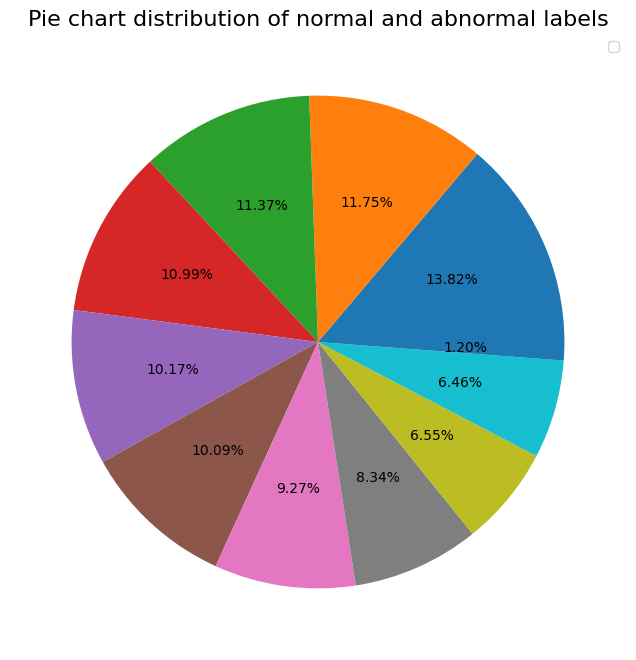

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data["Label"].value_counts(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()


# **Label Encoding**

In [ ]:
# Misalkan Anda sudah memuat data ke dalam DataFrame bernama `data`
# Menghapus spasi dari nama kolom
data.columns = data.columns.str.strip()

# Cek kolom untuk memastikan tidak ada spasi
print(data.columns)

Index(['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Le

In [ ]:
import pandas as pd

# Misalkan Anda sudah memuat data ke dalam DataFrame bernama `data`
# Siapkan fitur (X) dan target (y)
X = data.drop(['Label', 'Flow ID', 'Source IP', 'Destination IP'], axis=1)  # Menghapus kolom yang tidak diperlukan
y = data['Label']  # Menggunakan kolom 'Label' secara langsung

# Tampilkan beberapa informasi untuk memastikan semuanya benar
print("Fitur (X):")
print(X.head())
print("\nLabel (y):")
print(y.value_counts())  # Menampilkan distribusi label


Fitur (X):
   Unnamed: 0  Source Port  Destination Port  Protocol            Timestamp  \
0           0        51023               443         6  16/06/2017 03:55:47   
1           1        51023               443         6  16/06/2017 03:55:47   
2           2        34259               443         6  16/06/2017 03:55:52   
3           3        55509               443         6  16/06/2017 03:55:53   
4           4        44852               443         6  16/06/2017 03:55:58   

   Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         151054                  6                       8   
1            349                  2                       0   
2            119                  2                       0   
3          37055                  1                       1   
4         178727                  6                       7   

   Total Length of Fwd Packets  Total Length of Bwd Packets  ...  \
0                       1076.0                       4575.0  ...   

In [ ]:
# Label Encoding
bin_label = pd.DataFrame(data["Label"].map(lambda x:'normal' if x=="Benign" else 'abnormal'))

bin_data = data.copy()
bin_data["Label"] = bin_label

le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)

bin_data["Label"] = enc_label

bin_data["Label"].value_counts()

le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
bin_data["Label"].value_counts()

,count
Label,
0,348943
1,43091


# **Data Splitting**

In [ ]:
# **DATA SPLITTING**

# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


X_bin = bin_data.drop(columns=['Label'],axis=1)
y_bin = bin_data['Label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)


# **LIBRARY TRANSFORMER**

# **TRANSFORMER "FS"**

# **CLASSIFICATION Non-Tuning**

Fold 1
Accuracy for fold 1: 89.69%
F1 Score for fold 1: 0.8806
              precision    recall  f1-score   support

    abnormal       0.92      0.97      0.94     34922
      normal       0.56      0.27      0.36      4282

    accuracy                           0.90     39204
   macro avg       0.74      0.62      0.65     39204
weighted avg       0.88      0.90      0.88     39204



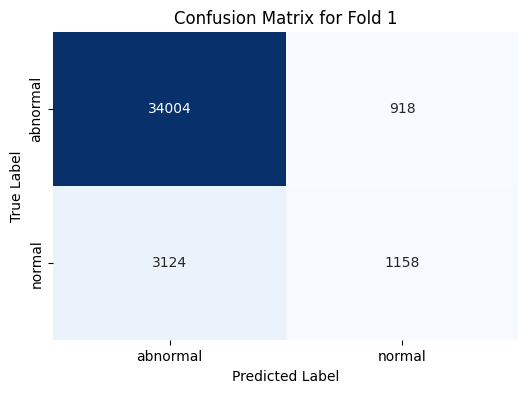

Fold 2
Accuracy for fold 2: 89.94%
F1 Score for fold 2: 0.8672
              precision    recall  f1-score   support

    abnormal       0.90      0.99      0.95     34866
      normal       0.74      0.14      0.23      4338

    accuracy                           0.90     39204
   macro avg       0.82      0.57      0.59     39204
weighted avg       0.89      0.90      0.87     39204



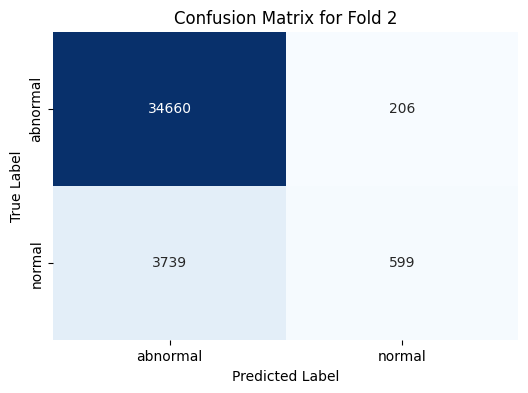

Fold 3
Accuracy for fold 3: 90.10%
F1 Score for fold 3: 0.8750
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34980
      normal       0.65      0.18      0.28      4224

    accuracy                           0.90     39204
   macro avg       0.78      0.58      0.61     39204
weighted avg       0.88      0.90      0.87     39204



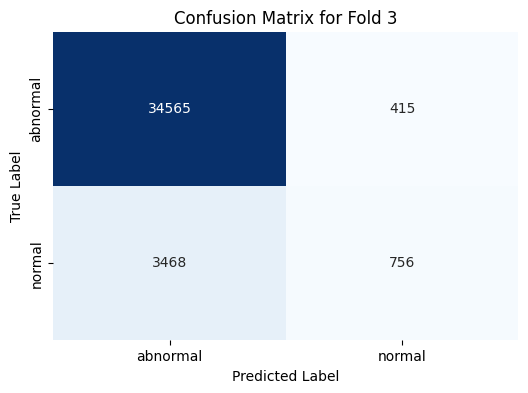

Fold 4
Accuracy for fold 4: 89.58%
F1 Score for fold 4: 0.8797
              precision    recall  f1-score   support

    abnormal       0.91      0.97      0.94     34813
      normal       0.57      0.28      0.38      4391

    accuracy                           0.90     39204
   macro avg       0.74      0.63      0.66     39204
weighted avg       0.88      0.90      0.88     39204



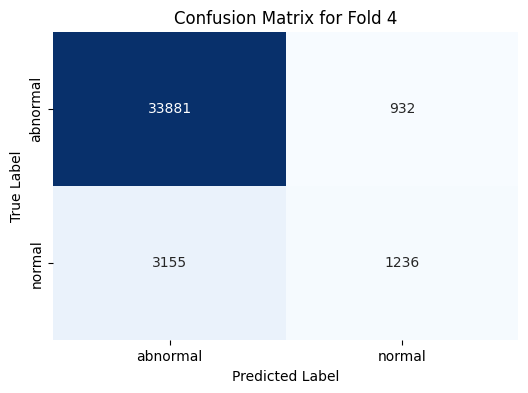

Fold 5
Accuracy for fold 5: 90.47%
F1 Score for fold 5: 0.8882
              precision    recall  f1-score   support

    abnormal       0.92      0.98      0.95     34939
      normal       0.64      0.29      0.40      4264

    accuracy                           0.90     39203
   macro avg       0.78      0.63      0.67     39203
weighted avg       0.89      0.90      0.89     39203



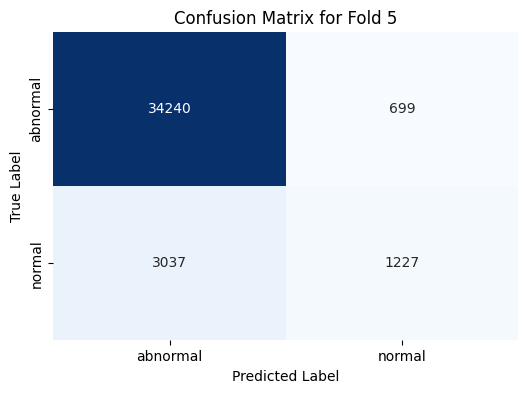

Fold 6
Accuracy for fold 6: 89.72%
F1 Score for fold 6: 0.8639
              precision    recall  f1-score   support

    abnormal       0.90      0.99      0.95     34881
      normal       0.69      0.12      0.21      4322

    accuracy                           0.90     39203
   macro avg       0.79      0.56      0.58     39203
weighted avg       0.88      0.90      0.86     39203



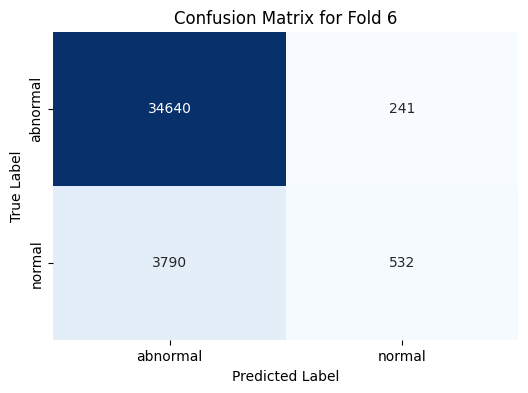

Fold 7
Accuracy for fold 7: 90.13%
F1 Score for fold 7: 0.8767
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34897
      normal       0.67      0.20      0.31      4306

    accuracy                           0.90     39203
   macro avg       0.79      0.59      0.63     39203
weighted avg       0.88      0.90      0.88     39203



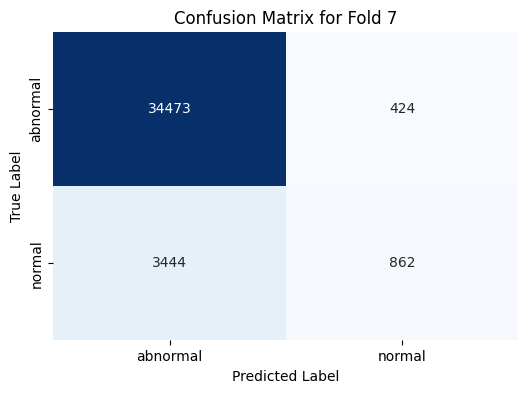

Fold 8
Accuracy for fold 8: 90.31%
F1 Score for fold 8: 0.8824
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34839
      normal       0.68      0.25      0.36      4364

    accuracy                           0.90     39203
   macro avg       0.80      0.62      0.65     39203
weighted avg       0.89      0.90      0.88     39203



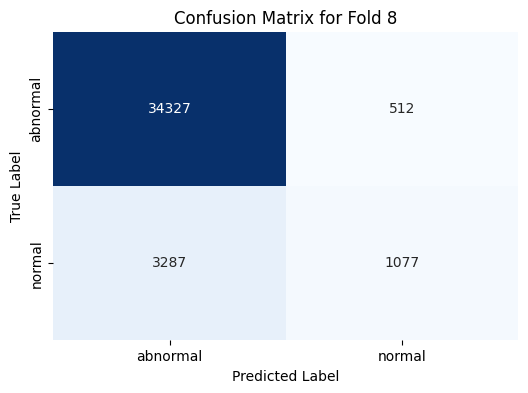

Fold 9
Accuracy for fold 9: 89.99%
F1 Score for fold 9: 0.8743
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34948
      normal       0.64      0.18      0.28      4255

    accuracy                           0.90     39203
   macro avg       0.77      0.58      0.61     39203
weighted avg       0.88      0.90      0.87     39203



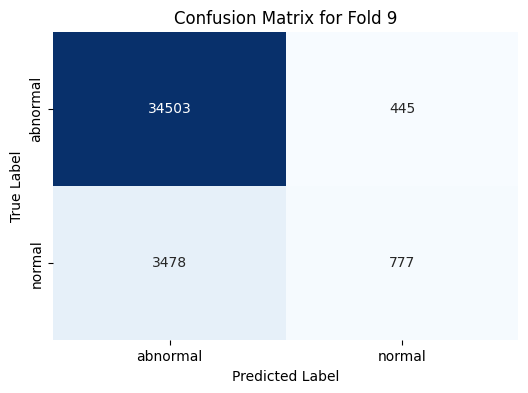

Fold 10
Accuracy for fold 10: 89.98%
F1 Score for fold 10: 0.8765
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34858
      normal       0.65      0.21      0.32      4345

    accuracy                           0.90     39203
   macro avg       0.78      0.60      0.63     39203
weighted avg       0.88      0.90      0.88     39203



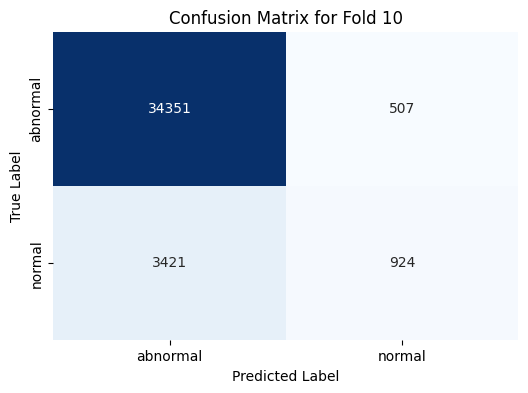

Average Accuracy: 89.99%
Average F1 Score: 0.8765


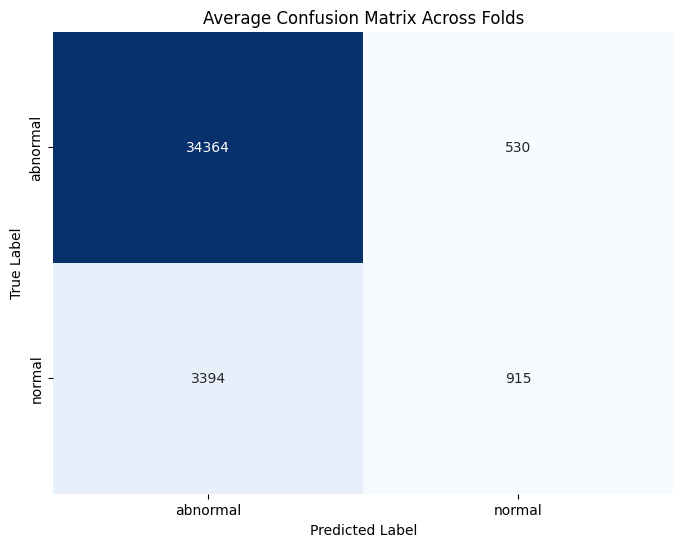

Hasil Deteksi Pola Enkripsi Ransomware:
Fold 1: Akurasi = 89.69%, F1 Score = 0.8806
Fold 2: Akurasi = 89.94%, F1 Score = 0.8672
Fold 3: Akurasi = 90.10%, F1 Score = 0.8750
Fold 4: Akurasi = 89.58%, F1 Score = 0.8797
Fold 5: Akurasi = 90.47%, F1 Score = 0.8882
Fold 6: Akurasi = 89.72%, F1 Score = 0.8639
Fold 7: Akurasi = 90.13%, F1 Score = 0.8767
Fold 8: Akurasi = 90.31%, F1 Score = 0.8824
Fold 9: Akurasi = 89.99%, F1 Score = 0.8743
Fold 10: Akurasi = 89.98%, F1 Score = 0.8765


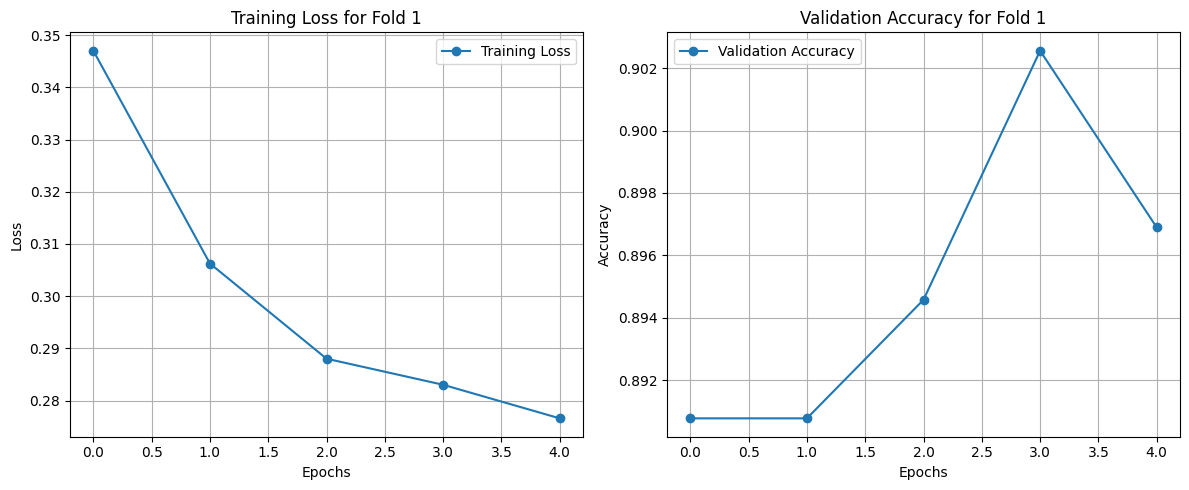

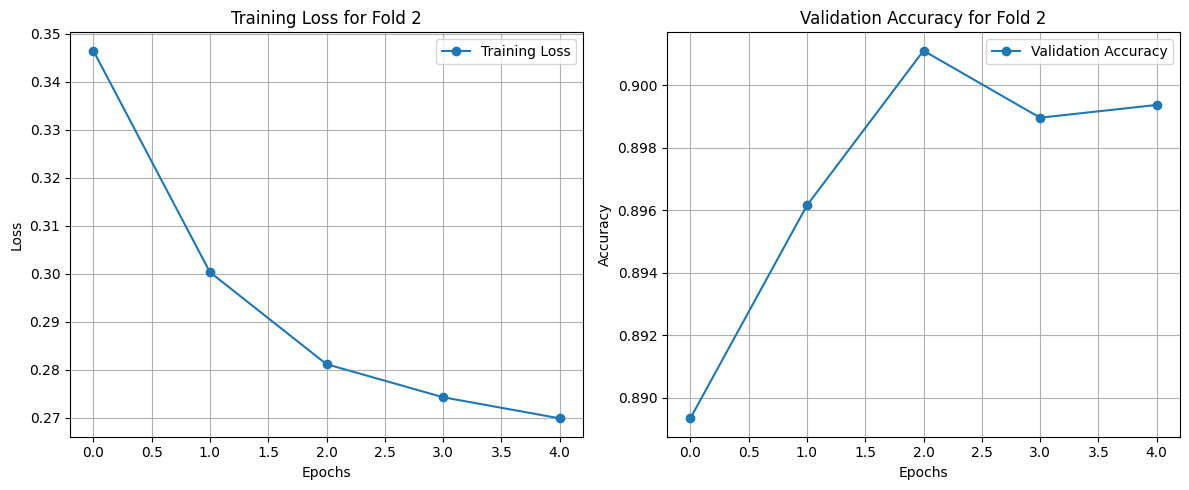

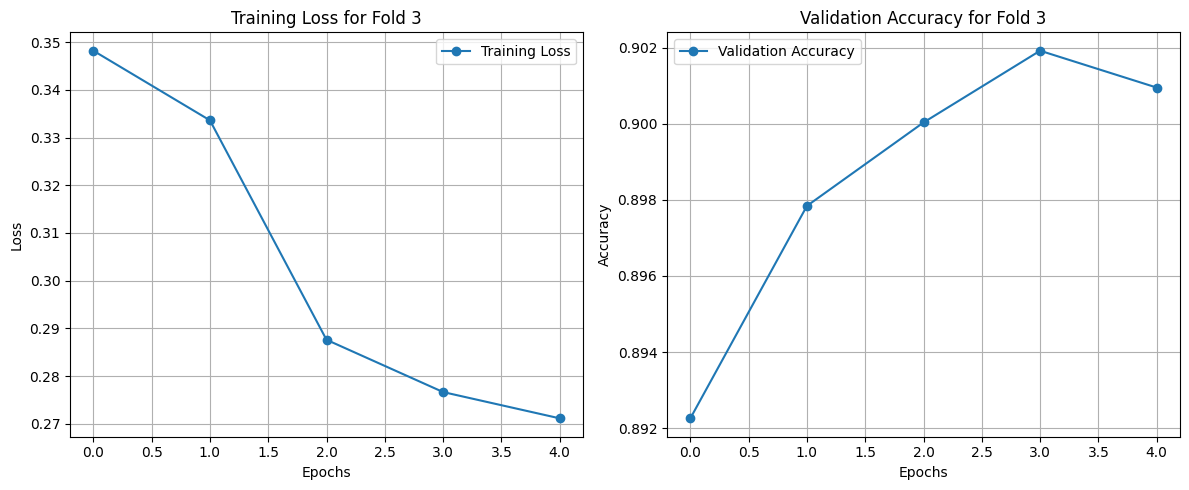

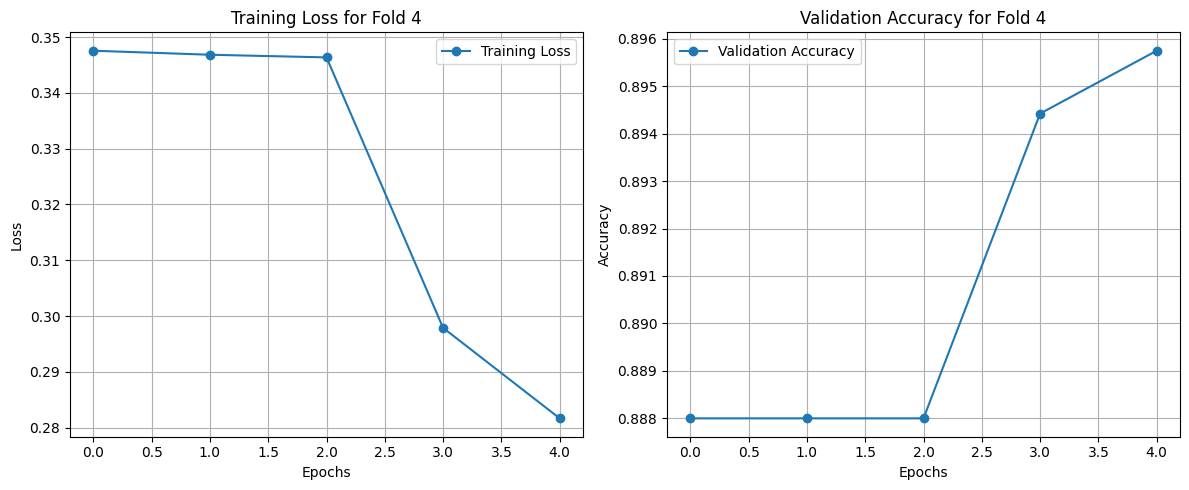

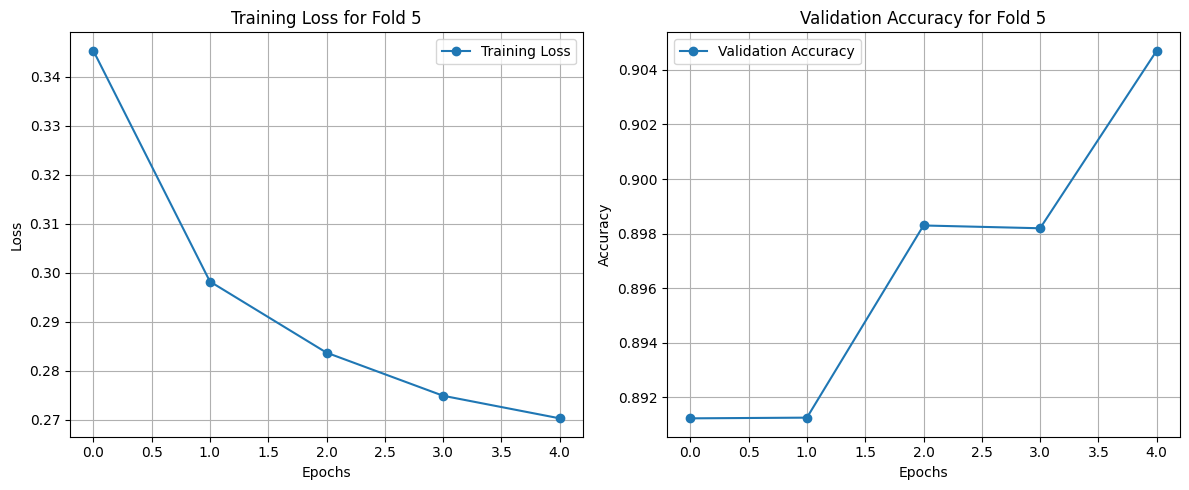

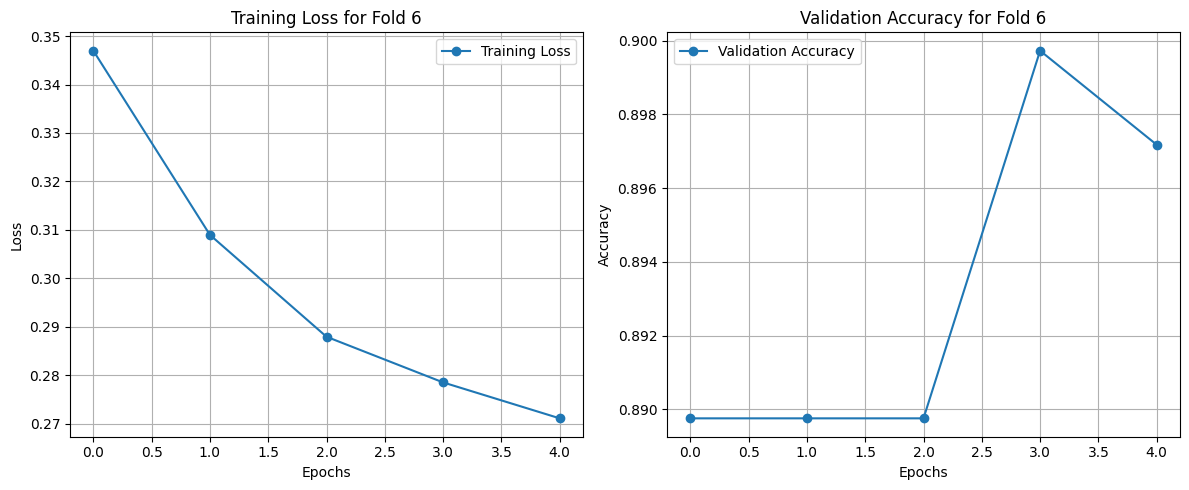

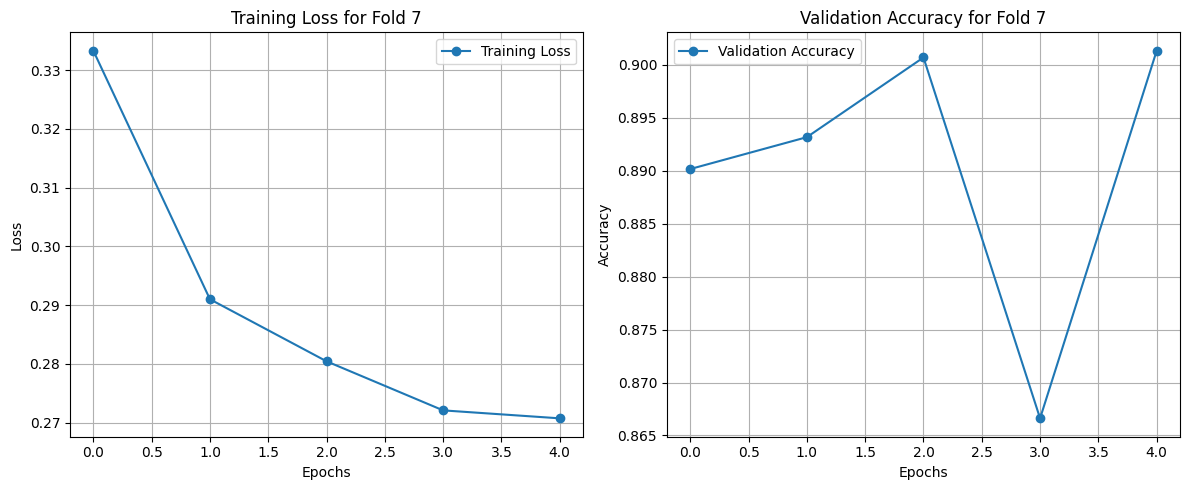

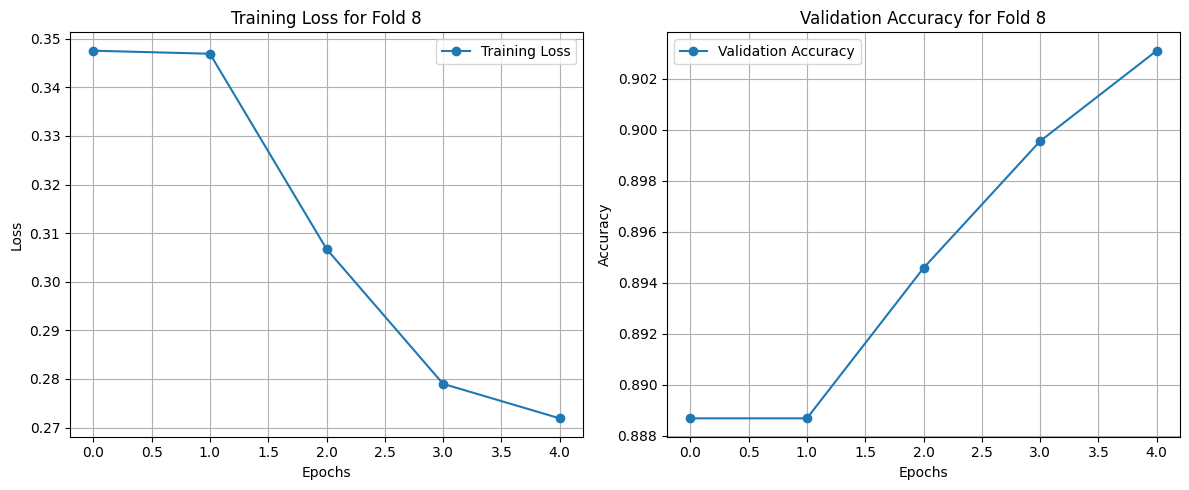

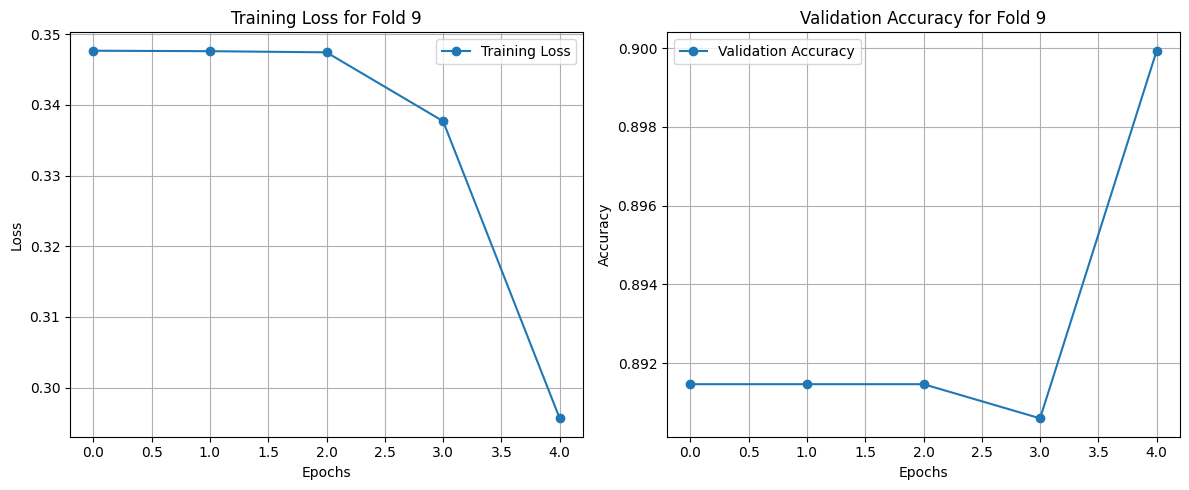

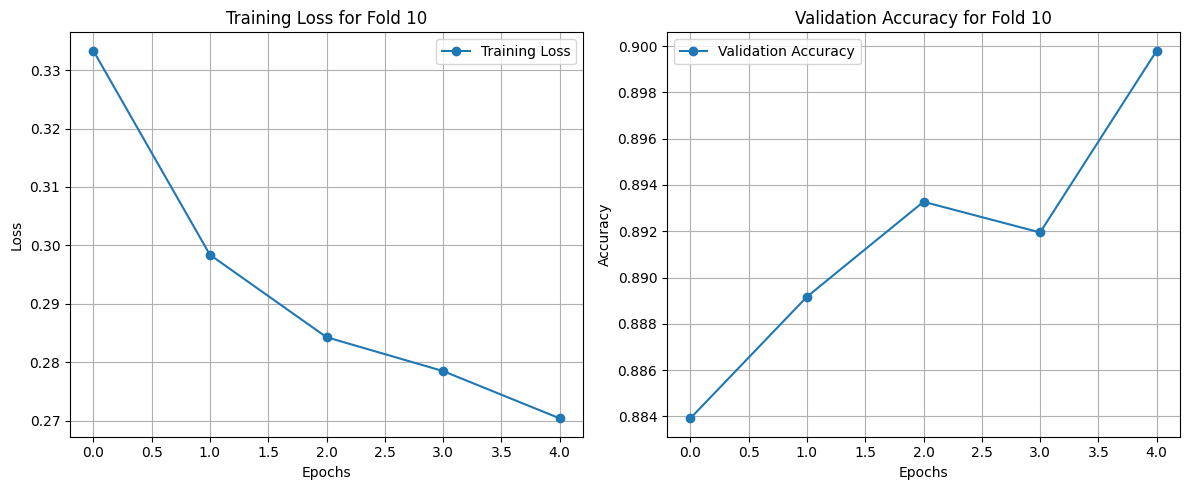

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_  # Save the original class names

# Check for missing values and replace with appropriate values
bin_data.fillna(0, inplace=True)  # Fill missing values with 0

# 2. Define FS-Transformer Model
class FSTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(FSTransformerModel, self).__init__()

        # Feature embedding for feature selection
        self.feature_embedding = nn.Parameter(torch.randn(input_dim, d_model))  # Learnable embedding for each feature
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = x @ self.feature_embedding  # Apply feature selection through embedding
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['Label']).iloc[train_index], bin_data.drop(columns=['Label']).iloc[val_index]
    y_train, y_val = bin_data['Label'].iloc[train_index], bin_data['Label'].iloc[val_index]

    # Convert to PyTorch tensors (only numeric columns)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the FS-Transformer model
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 5  # Increase the number of epochs if needed
    train_losses = []  # List to store loss per epoch
    val_accuracies = []  # List to store accuracy per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


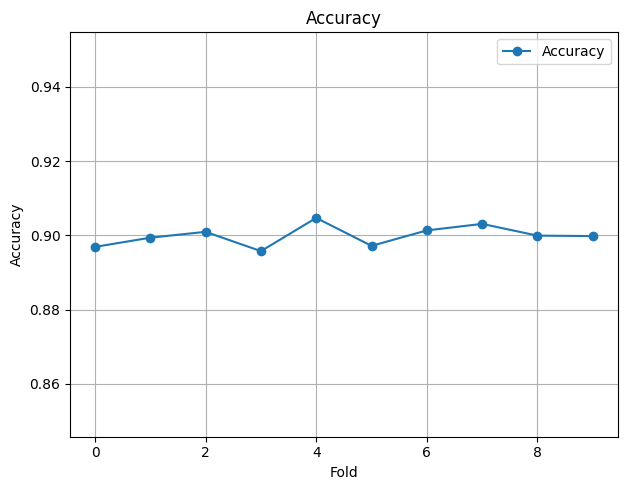

In [ ]:
plt.figure(figsize=(12, 5))

# Grafik Akurasi
plt.subplot(1, 2, 2)
plt.plot(all_accuracy, label='Accuracy', marker='o')
plt.title(f'Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(min(all_accuracy)-0.05, max(all_accuracy)+0.05)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# **Hyperparameter Tuning**

In [ ]:
import itertools
# Define the hyperparameters grid
param_grid = {
    'lr': [0.001, 0.0005],
    'batch_size': [16, 32],
    'nhead': [2, 4]
}

# Track the best model
best_accuracy = 0
best_params = None

# Loop over all combinations of hyperparameters
for lr, batch_size, nhead in itertools.product(param_grid['lr'],
                                               param_grid['batch_size'],
                                               param_grid['nhead']):
    print(f'Training with lr={lr}, batch_size={batch_size}, nhead={nhead}')

    # Reinitialize model with new hyperparameters, ensuring consistent d_model
    # ***CHANGE*** Use X_train_tensor.shape[1] for input_dim
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1],
                             num_classes=len(class_names),
                             d_model=128, nhead=nhead, num_layers=3, dropout=0.3)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # DataLoader with the new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Train for 2 epochs (for quick demonstration)
    for epoch in range(2):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Validate and calculate accuracy
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_val_tensor)
        _, y_pred = torch.max(y_pred_probs, 1)
        accuracy = accuracy_score(y_val, y_pred.numpy())

    print(f'Validation Accuracy: {accuracy * 100:.2f}%')

    # Save best parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'lr': lr, 'batch_size': batch_size, 'nhead': nhead}

print(f'Best Params: {best_params} with Accuracy: {best_accuracy * 100:.2f}%')

Training with lr=0.001, batch_size=16, nhead=2
Validation Accuracy: 88.92%
Training with lr=0.001, batch_size=16, nhead=4
Validation Accuracy: 88.92%
Training with lr=0.001, batch_size=32, nhead=2
Validation Accuracy: 88.92%
Training with lr=0.001, batch_size=32, nhead=4
Validation Accuracy: 88.92%
Training with lr=0.0005, batch_size=16, nhead=2
Validation Accuracy: 88.92%
Training with lr=0.0005, batch_size=16, nhead=4
Validation Accuracy: 88.92%
Training with lr=0.0005, batch_size=32, nhead=2
Validation Accuracy: 88.92%
Training with lr=0.0005, batch_size=32, nhead=4
Validation Accuracy: 88.92%
Best Params: {'lr': 0.001, 'batch_size': 16, 'nhead': 2} with Accuracy: 88.92%


# **CLASSIFICATION With Hyperparameter Tuning**

Fold 1
Accuracy for fold 1: 89.69%
F1 Score for fold 1: 0.8806
              precision    recall  f1-score   support

    abnormal       0.92      0.97      0.94     34922
      normal       0.56      0.27      0.36      4282

    accuracy                           0.90     39204
   macro avg       0.74      0.62      0.65     39204
weighted avg       0.88      0.90      0.88     39204



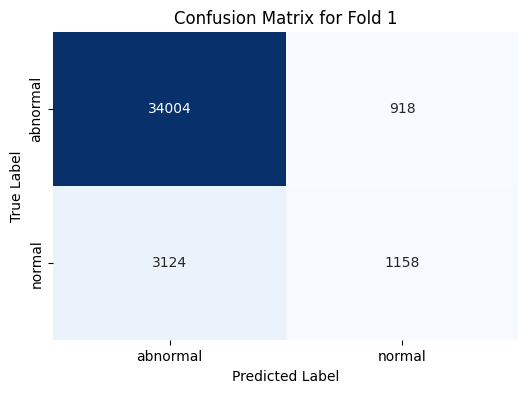

Fold 2
Accuracy for fold 2: 89.94%
F1 Score for fold 2: 0.8672
              precision    recall  f1-score   support

    abnormal       0.90      0.99      0.95     34866
      normal       0.74      0.14      0.23      4338

    accuracy                           0.90     39204
   macro avg       0.82      0.57      0.59     39204
weighted avg       0.89      0.90      0.87     39204



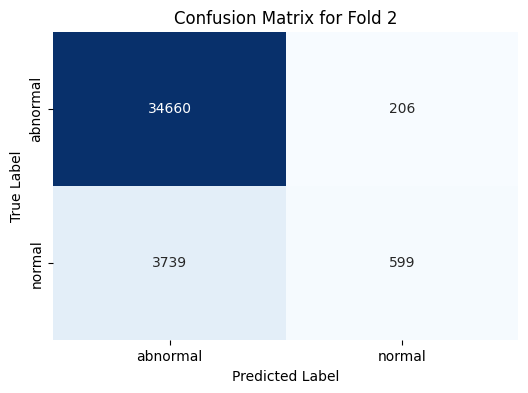

Fold 3
Accuracy for fold 3: 90.10%
F1 Score for fold 3: 0.8750
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34980
      normal       0.65      0.18      0.28      4224

    accuracy                           0.90     39204
   macro avg       0.78      0.58      0.61     39204
weighted avg       0.88      0.90      0.87     39204



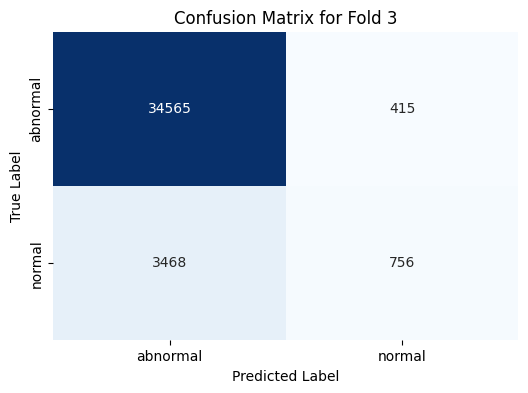

Fold 4
Accuracy for fold 4: 89.58%
F1 Score for fold 4: 0.8797
              precision    recall  f1-score   support

    abnormal       0.91      0.97      0.94     34813
      normal       0.57      0.28      0.38      4391

    accuracy                           0.90     39204
   macro avg       0.74      0.63      0.66     39204
weighted avg       0.88      0.90      0.88     39204



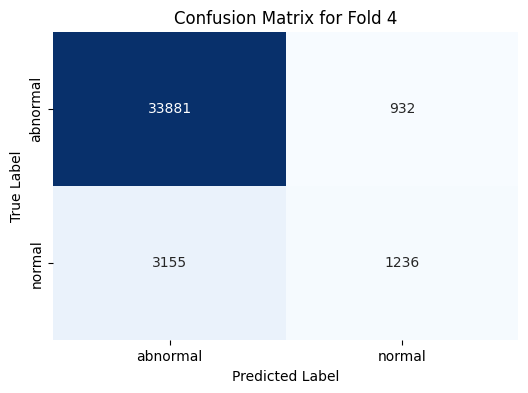

Fold 5
Accuracy for fold 5: 90.47%
F1 Score for fold 5: 0.8882
              precision    recall  f1-score   support

    abnormal       0.92      0.98      0.95     34939
      normal       0.64      0.29      0.40      4264

    accuracy                           0.90     39203
   macro avg       0.78      0.63      0.67     39203
weighted avg       0.89      0.90      0.89     39203



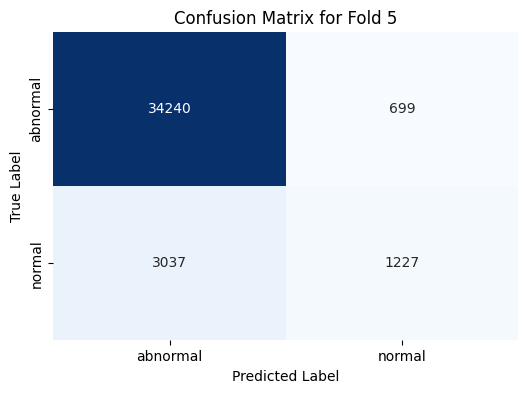

Fold 6
Accuracy for fold 6: 89.72%
F1 Score for fold 6: 0.8639
              precision    recall  f1-score   support

    abnormal       0.90      0.99      0.95     34881
      normal       0.69      0.12      0.21      4322

    accuracy                           0.90     39203
   macro avg       0.79      0.56      0.58     39203
weighted avg       0.88      0.90      0.86     39203



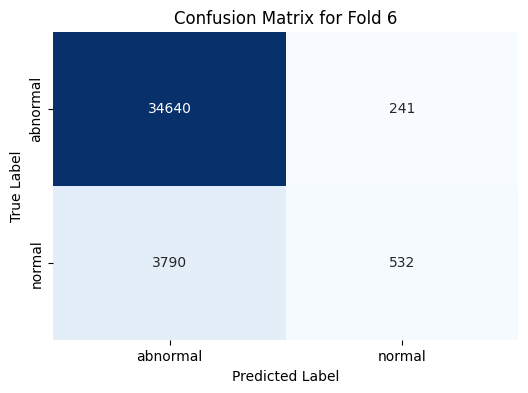

Fold 7
Accuracy for fold 7: 90.13%
F1 Score for fold 7: 0.8767
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34897
      normal       0.67      0.20      0.31      4306

    accuracy                           0.90     39203
   macro avg       0.79      0.59      0.63     39203
weighted avg       0.88      0.90      0.88     39203



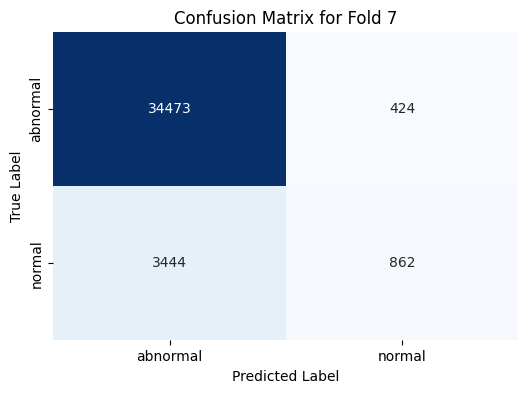

Fold 8
Accuracy for fold 8: 90.31%
F1 Score for fold 8: 0.8824
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34839
      normal       0.68      0.25      0.36      4364

    accuracy                           0.90     39203
   macro avg       0.80      0.62      0.65     39203
weighted avg       0.89      0.90      0.88     39203



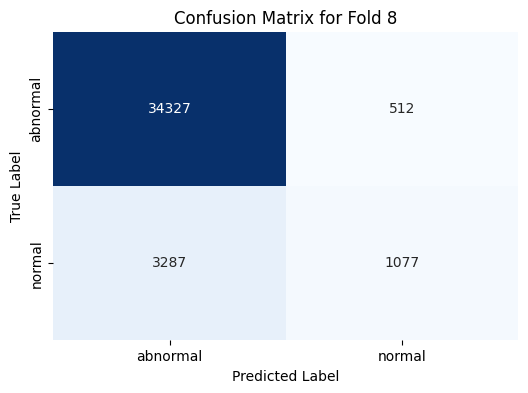

Fold 9
Accuracy for fold 9: 89.99%
F1 Score for fold 9: 0.8743
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34948
      normal       0.64      0.18      0.28      4255

    accuracy                           0.90     39203
   macro avg       0.77      0.58      0.61     39203
weighted avg       0.88      0.90      0.87     39203



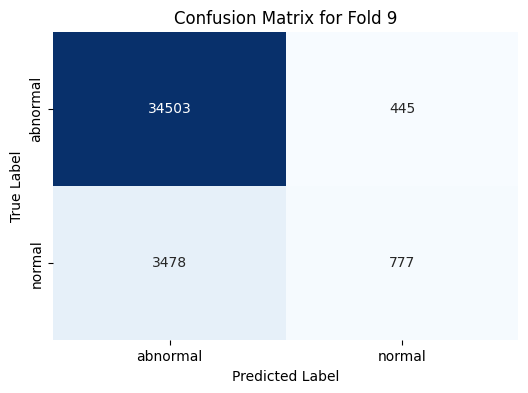

Fold 10
Accuracy for fold 10: 89.98%
F1 Score for fold 10: 0.8765
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34858
      normal       0.65      0.21      0.32      4345

    accuracy                           0.90     39203
   macro avg       0.78      0.60      0.63     39203
weighted avg       0.88      0.90      0.88     39203



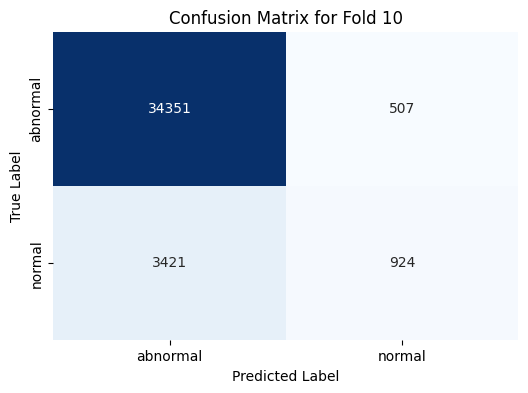

Average Accuracy: 89.99%
Average F1 Score: 0.8765


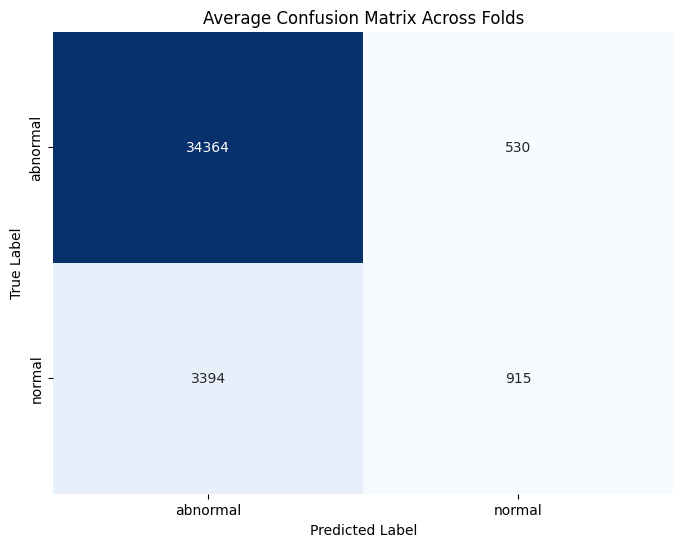

Hasil Deteksi Pola Enkripsi Ransomware:
Fold 1: Akurasi = 89.69%, F1 Score = 0.8806
Fold 2: Akurasi = 89.94%, F1 Score = 0.8672
Fold 3: Akurasi = 90.10%, F1 Score = 0.8750
Fold 4: Akurasi = 89.58%, F1 Score = 0.8797
Fold 5: Akurasi = 90.47%, F1 Score = 0.8882
Fold 6: Akurasi = 89.72%, F1 Score = 0.8639
Fold 7: Akurasi = 90.13%, F1 Score = 0.8767
Fold 8: Akurasi = 90.31%, F1 Score = 0.8824
Fold 9: Akurasi = 89.99%, F1 Score = 0.8743
Fold 10: Akurasi = 89.98%, F1 Score = 0.8765


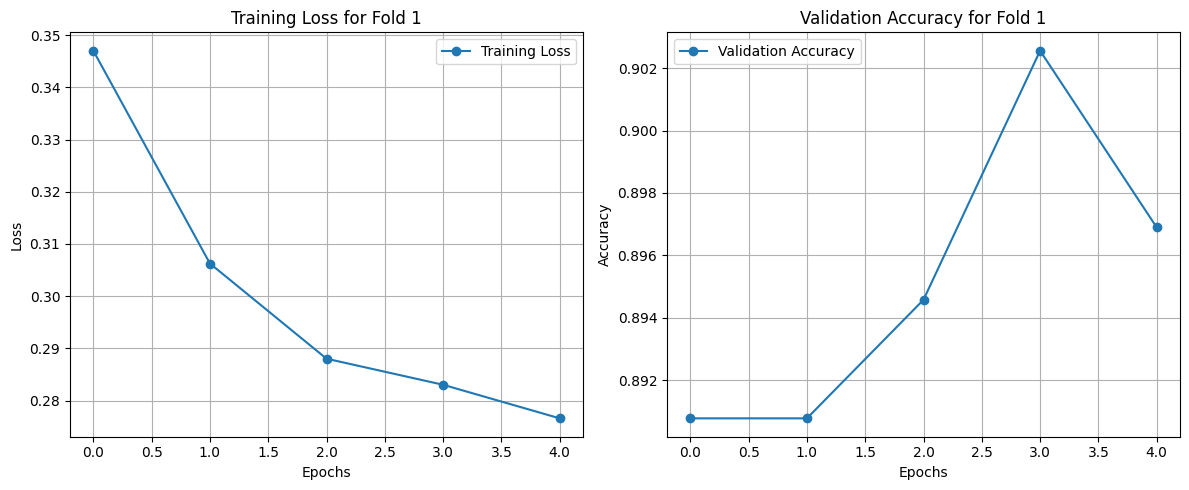

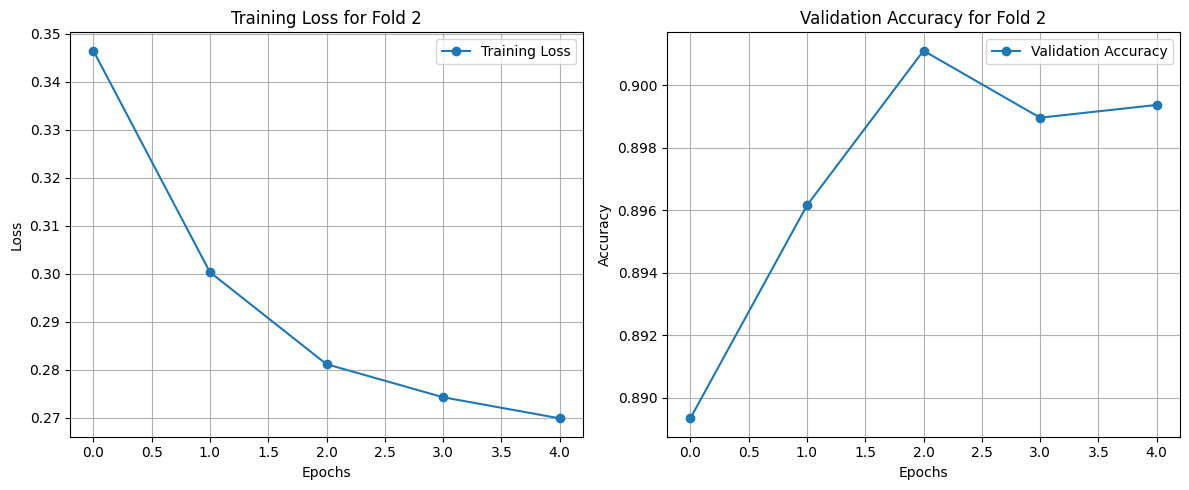

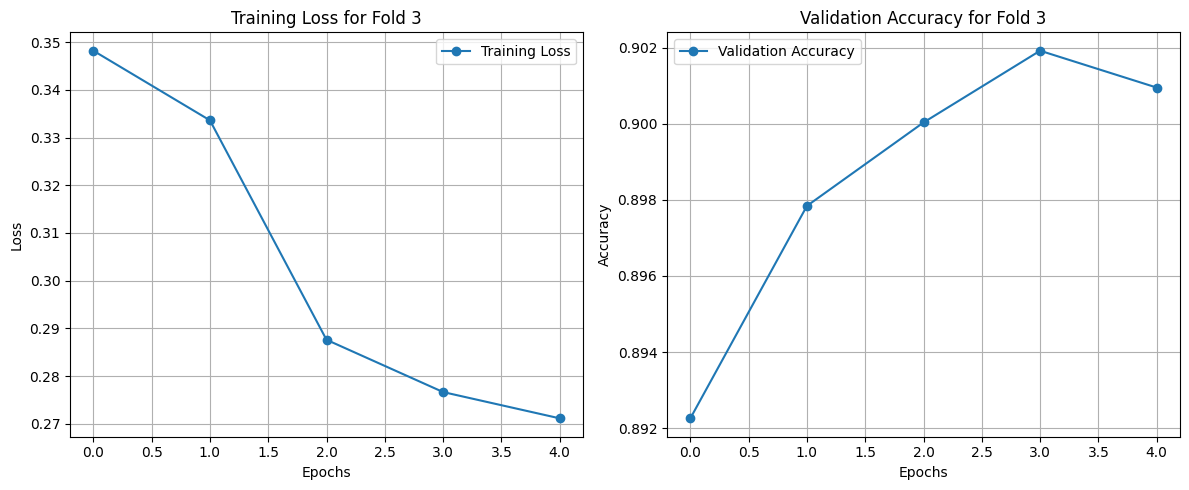

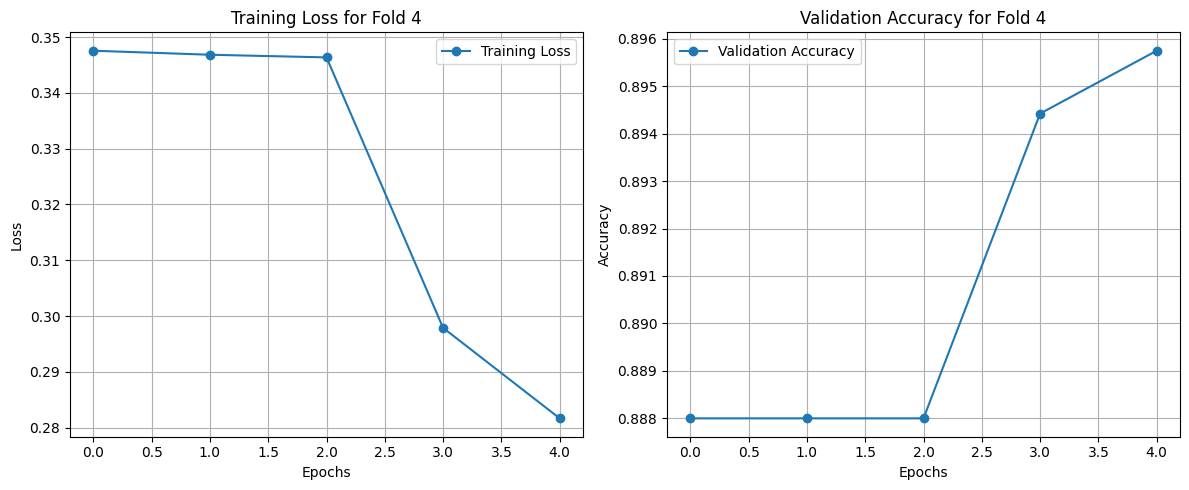

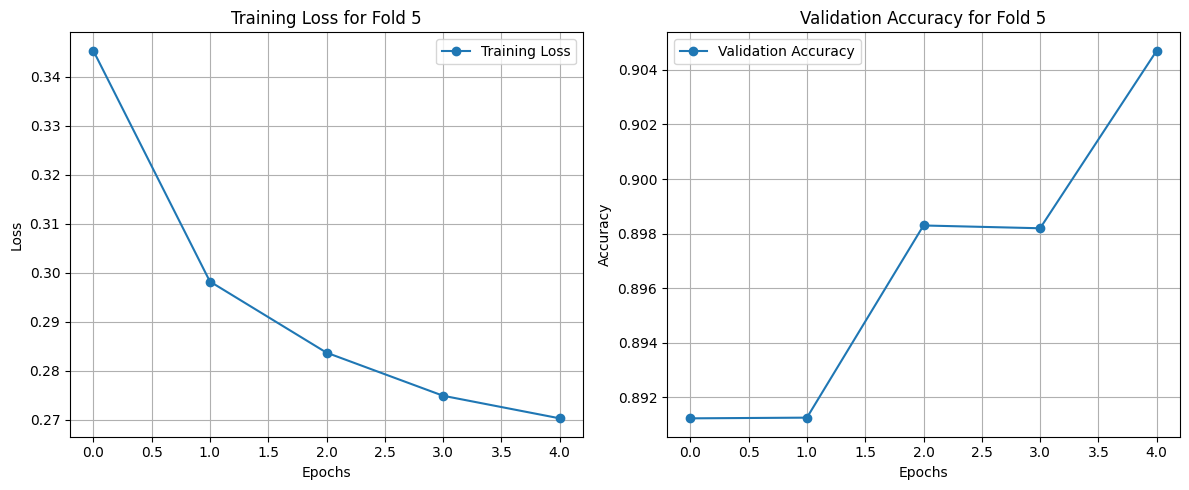

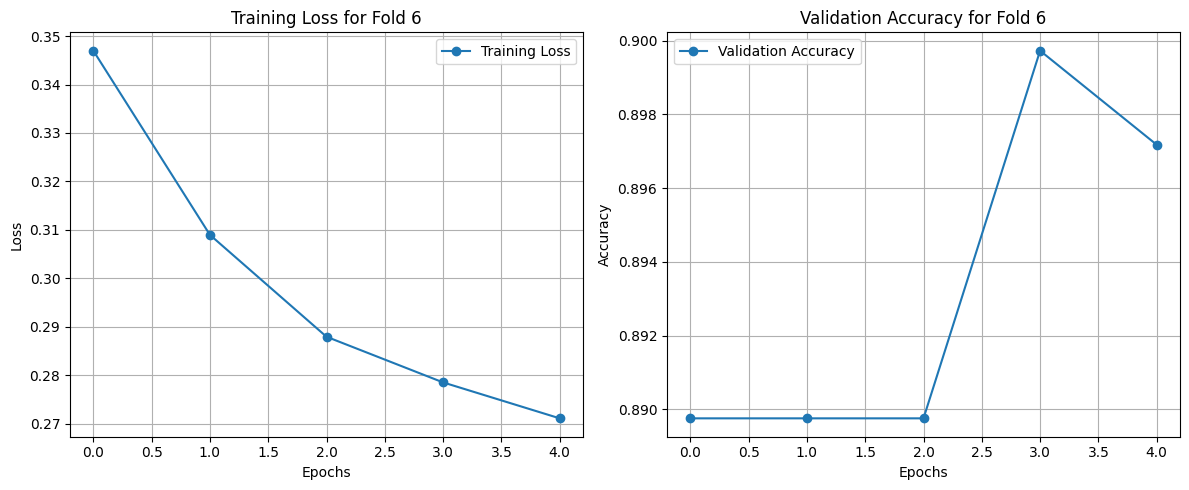

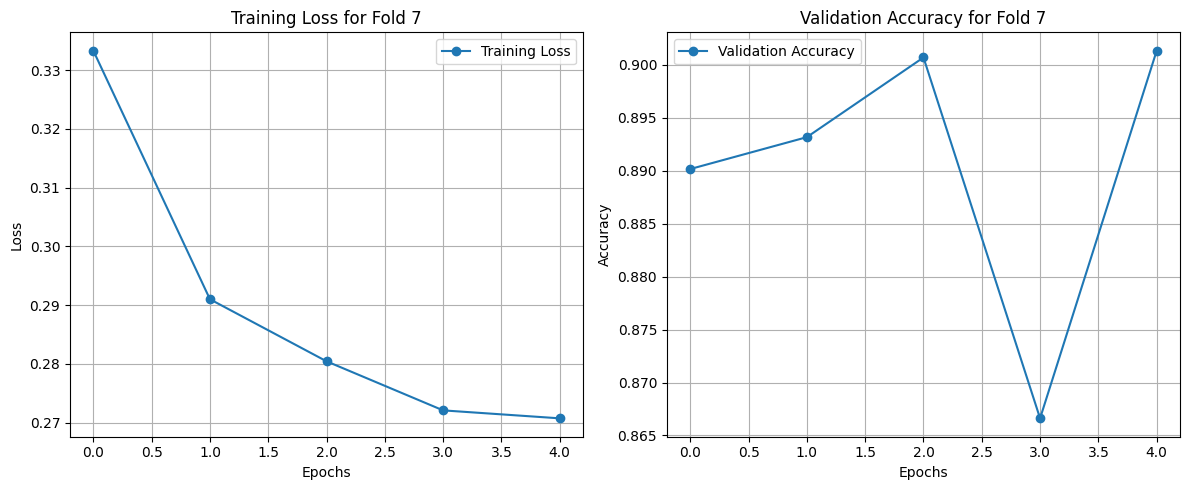

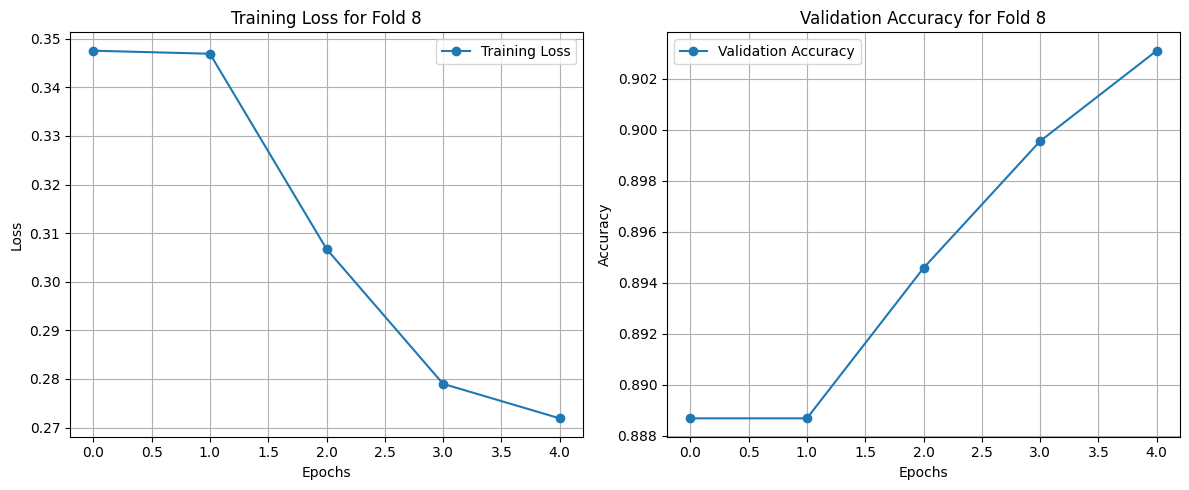

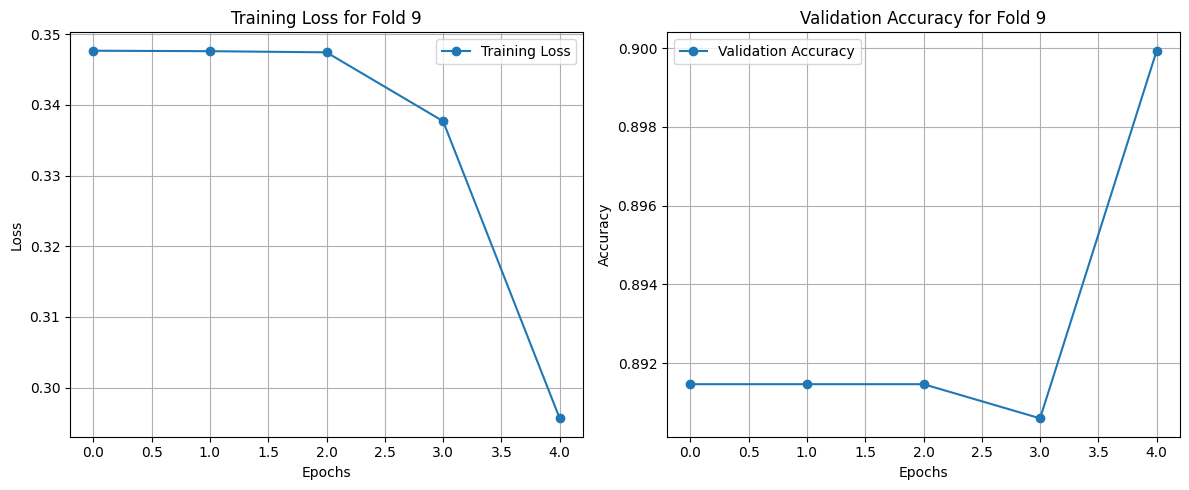

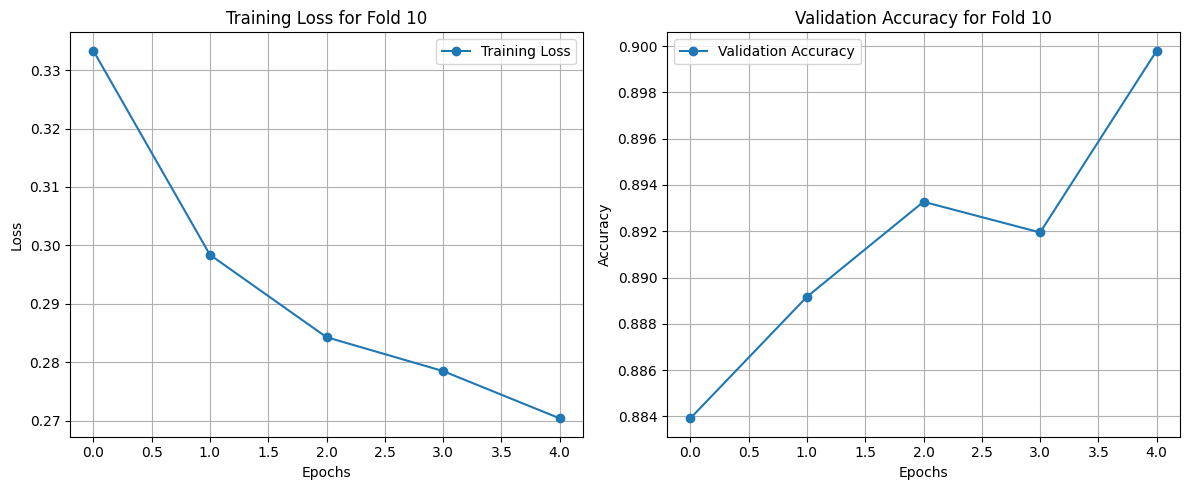

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_  # Save the original class names

# Check for missing values and replace with appropriate values
bin_data.fillna(0, inplace=True)  # Fill missing values with 0

# 2. Define FS-Transformer Model
class FSTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(FSTransformerModel, self).__init__()

        # Feature embedding for feature selection
        self.feature_embedding = nn.Parameter(torch.randn(input_dim, d_model))  # Learnable embedding for each feature
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = x @ self.feature_embedding  # Apply feature selection through embedding
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['Label']).iloc[train_index], bin_data.drop(columns=['Label']).iloc[val_index]
    y_train, y_val = bin_data['Label'].iloc[train_index], bin_data['Label'].iloc[val_index]

    # Convert to PyTorch tensors (only numeric columns)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the FS-Transformer model
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 5  # Increase the number of epochs if needed
    train_losses = []  # List to store loss per epoch
    val_accuracies = []  # List to store accuracy per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
